In [198]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from pandas.api.types import CategoricalDtype
sns.set(style="ticks", color_codes=True)

In [199]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-79V6INH\DANIEL1;"
                      "Database=pharmacy_1;"
                      "Trusted_Connection=yes;")

In [200]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.pro_1')
full_data=cursor

In [202]:
df = pd.read_sql( 'SELECT * FROM dbo.pro_1',conn)
df.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq  
0  1000084527       20110         1  3.56    60  
1  1999004071       20120         1  0.35    30  
2  1999003192       20120         1  0.51    30  
3  1999001402       20110         1   7.7     8  
4  1999001542       20120         1  0.16    30

In [203]:
df['sku'] = df['sku'].astype(int)

### merge_pharma_1p

In [204]:
import pandas as pd

df1 = pd.read_csv (r'C:\Users\DANIEL\Documents\DataScience\data\pharma_1p.csv')
df1.head()

sku form  q_pac                    pharmaco_3 pharmaco_c
0  1000001081  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
1  1000001082  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
2  1000001083  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
3  1000001618  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A
4  1000001689  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A

In [205]:
df1['sku'] = df1['sku'].astype(int)

In [206]:
df2 = df.merge(df1, on='sku', how='left')
df2.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [207]:
df2.shape

(12628378, 15)

In [208]:
df2.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers       object
price           object
tranq           object
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [209]:
df3=df2
df3=df2.loc[(df2['yyyy_mm'] <= '201906')]
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [210]:
df3.shape

(10527735, 15)

# droping [\"\',] from values & updating data types

In [211]:
df3['tranq'] = df3['tranq'].str.replace(r"[\"\',]", '')

In [212]:
df3['price'] = df3['price'].str.replace(r"[\"\',]", '')

In [213]:
df3['tranq'] = df3['tranq'].astype(float)

In [214]:
df3['tranq'] = df3['tranq'].astype(int)

In [215]:
df3['price'] = df3['price'].astype(float)

In [216]:
df3['customers'] = df3['customers'].astype(int)

In [217]:
df3.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers        int32
price          float64
tranq            int32
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [218]:
dfpy = df3[['customers', 'price','tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E93FE7048>,
      dtype=object)

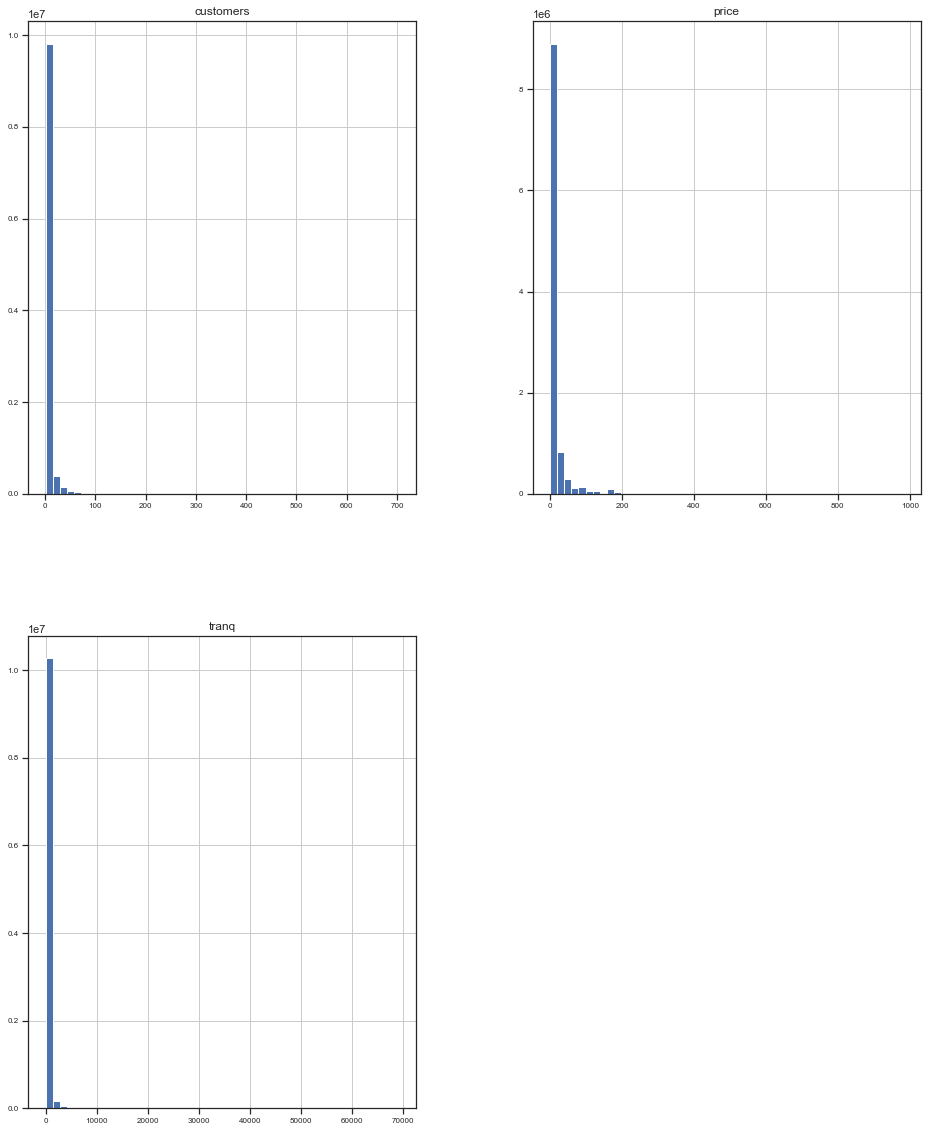

In [219]:
dfpy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

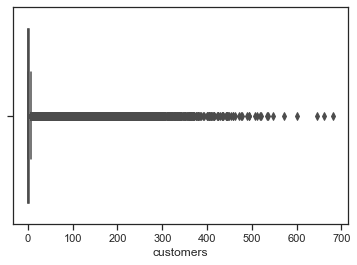

In [220]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

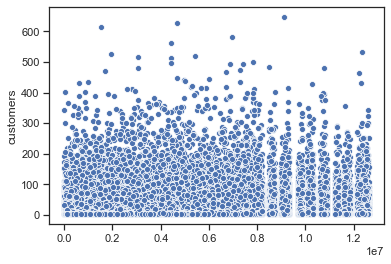

In [221]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

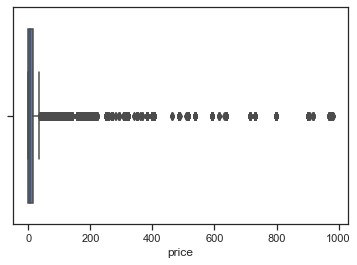

In [222]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

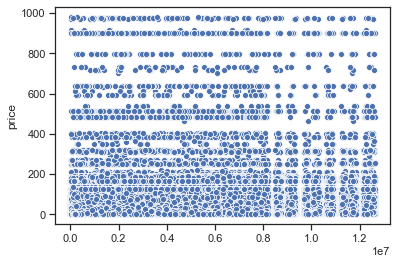

In [223]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

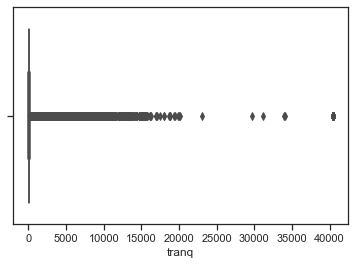

In [224]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

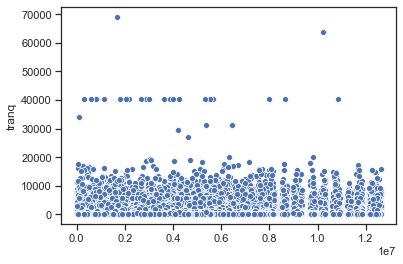

In [225]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

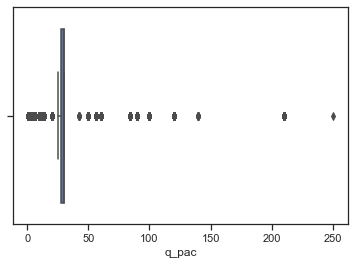

In [226]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['q_pac'])

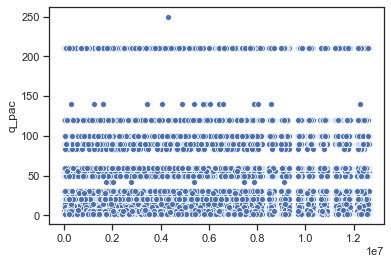

In [227]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['q_pac'])

In [33]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [18]:
#dfeda = df1[['customers','price','tranq']]

In [40]:
#from pyMechkar import exploreData
#exploreData(dfeda.sample(n = 1000000), y="tranq")

# EDA

In [30]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df3.sample(n = 1000000))
prof.to_file(output_file='output.html')
prof.to_notebook_iframe()

In [228]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers  price  tranq form  q_pac  \
0  1000084527       20110          1   3.56     60  TAB   60.0   
1  1999004071       20120          1   0.35     30  TAB   30.0   
2  1999003192       20120          1   0.51     30  TAB   30.0   
3  1999001402       20110          1   7.70      8  INJ    5.0   
4  1999001542       20120          1   0.16     30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

# binary encoding

## affiliation

In [229]:
s = df3['affiliation'].value_counts(normalize=True) * 100 
df3['affiliation_Binary'] = df3['affiliation'].map(s)

In [230]:
df3[['affiliation_Binary', 'affiliation']].head()

affiliation_Binary affiliation
0           20.486952       20110
1           76.558215       20120
2           76.558215       20120
3           20.486952       20110
4           76.558215       20120

## district

In [231]:
s = df3['district'].value_counts(normalize=True) * 100 
df3['district_Binary'] = df3['district'].map(s)

In [232]:
df3.sample(n = 100)[['district_Binary', 'district']].head()

district_Binary district
3547549         13.326618     1577
1660564         12.842800      777
842586          16.633169      577
10630614        14.894609     1277
764994          16.633169      577

## pharmaco_c

In [233]:
s = df3['pharmaco_c'].value_counts(normalize=True) * 100 
df3['pharmaco_c_Binary'] = df3['pharmaco_c'].map(s)

In [234]:
df3.sample(n = 100)[['pharmaco_c_Binary', 'pharmaco_c']].head()

pharmaco_c_Binary pharmaco_c
5200737           6.343013       C08C
7571780          11.895037       C07A
3547622           1.834599       C01B
2445939           5.024373       B03A
5080341           5.011165       C09C

## store_code

In [235]:
s = df3['store_code'].value_counts(normalize=True) * 100 
df3['store_code_Binary'] = df3['store_code'].map(s)

In [236]:
df3.sample(n = 100)[['store_code_Binary', 'store_code']].head()

store_code_Binary store_code
8542072           0.156225       4090
209785            0.246786       9076
6765676           0.198770       3008
2902949           0.377964       3063
4014923           0.135575       5336

## FORM

In [237]:
s = df3['form'].value_counts(normalize=True) * 100 
df3['form_Binary'] = df3['form'].map(s)

In [238]:
df3.sample(n = 100)[['form_Binary', 'form']].head()

form_Binary form
5478615    85.070314  TAB
6364650    85.070314  TAB
7405560    85.070314  TAB
6031403    85.070314  TAB
2743446    85.070314  TAB

# log x+1

## ['customers', 'price','tranq', 'q_pac']

In [239]:
to_log = ['customers', 'price','tranq', 'q_pac']

In [240]:
df3[to_log] = df3[to_log].applymap(lambda x: np.log(x+1)) # add columns log to dataframe

# one hot encoding

# year

In [44]:
# Get one hot encoding of columns
#one_hot = pd.get_dummies(df3['year'])
#df3 = df3.join(one_hot) 

## form

In [241]:
df3['form'].value_counts()

TAB    8920240
CPL     306872
CAP     286823
INJ     281005
PEN     168693
DRP      91149
AMP      72214
CR       65288
SUP      60094
SYR      56210
SRG      52416
OIN      36813
GEL      19069
SOL      18254
SPR      15017
VIA      10285
SUS       9623
PAT       5850
PWD       3914
LOZ       3082
INF       1754
GRA        536
ELX        525
Name: form, dtype: int64

In [49]:
# Get one hot encoding of columns a
#one_hot = pd.get_dummies(df3['form'])
#df3 = df3.join(one_hot) 

In [46]:
#with pd.option_context('display.precision', 2):
          # df3[['affiliation_Binary','district_Binary']]

In [242]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers     price     tranq form     q_pac  \
0  1000084527       20110   0.693147  1.517323  4.110874  TAB  4.110874   
1  1999004071       20120   0.693147  0.300105  3.433987  TAB  3.433987   
2  1999003192       20120   0.693147  0.412110  3.433987  TAB  3.433987   
3  1999001402       20110   0.693147  2.163323  2.197225  INJ  1.791759   
4  1999001542       20120   0.693147  0.148420  3.433987  TAB  3.433987   

                                  pharmaco_3 pharmaco_c  affiliation_Binary  \
0                      ANTITHROMBOTIC AGENTS       B01A           20.486952   
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B           76.558215   
2               LIPID MODIFYING AGENTS PLAIN       C10A           76.558215   
3                          IRON PREPARATIONS       B03A           20.486952   
4               LIPID MODIFYING AGENTS PLAIN       C10A           76.558215   

   district_Binary  pharmaco_c_Binary  store_code_Binary  form_Binary  
0        13.209299          12.798761           0.183249    85.070314  
1        13.209299           0.177298           0.183249    85.070314  
2        13.209299          22.798831           0.183249    85.070314  
3        13.209299           5.024373           0.183249     2.679881  
4        13.209299          22.798831           0.183249    85.070314

# Outlier Detection

### Graphical methods

#### customers

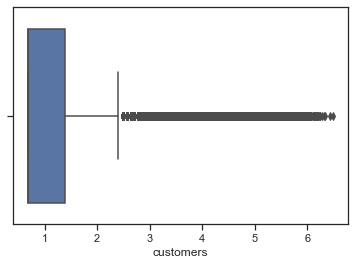

In [243]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

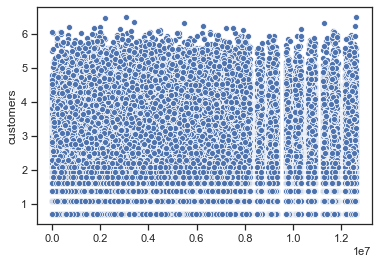

In [244]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

### price

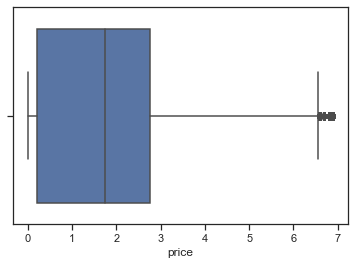

In [245]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

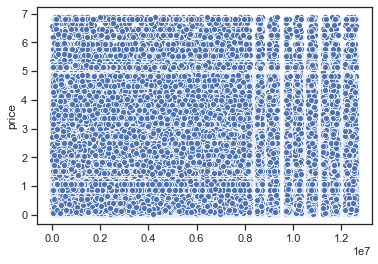

In [246]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

### tranq

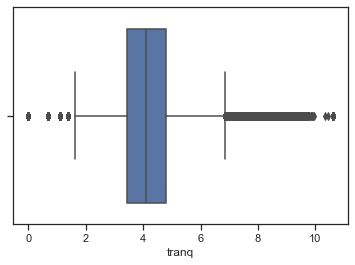

In [247]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

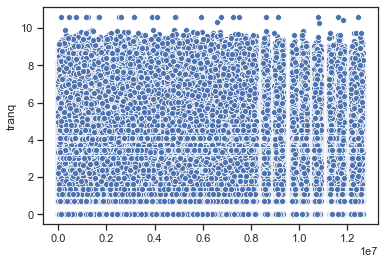

In [248]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

## q_pac

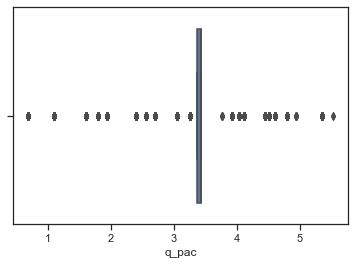

In [249]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['q_pac'])

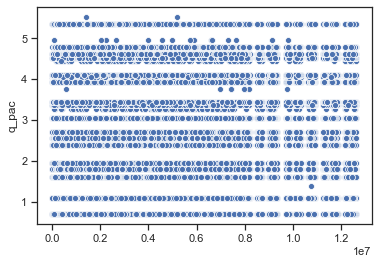

In [250]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['q_pac'])

# Missing Values

In [251]:
print(df3.isnull().sum())

year                      0
yyyy_mm                   0
store_code                0
district                  0
sku                       0
item_name                 0
genery                    0
affiliation               0
customers                 0
price                     0
tranq                     0
form                  42009
q_pac                 42009
pharmaco_3            42009
pharmaco_c            42009
affiliation_Binary        0
district_Binary           0
pharmaco_c_Binary     42009
store_code_Binary         0
form_Binary           42009
dtype: int64


In [252]:
df3 = df3.dropna(how='any',axis=0) 

In [253]:
print(df3.isnull().sum())

year                  0
yyyy_mm               0
store_code            0
district              0
sku                   0
item_name             0
genery                0
affiliation           0
customers             0
price                 0
tranq                 0
form                  0
q_pac                 0
pharmaco_3            0
pharmaco_c            0
affiliation_Binary    0
district_Binary       0
pharmaco_c_Binary     0
store_code_Binary     0
form_Binary           0
dtype: int64


In [254]:
df3['form'].value_counts()

TAB    8920240
CPL     306872
CAP     286823
INJ     281005
PEN     168693
DRP      91149
AMP      72214
CR       65288
SUP      60094
SYR      56210
SRG      52416
OIN      36813
GEL      19069
SOL      18254
SPR      15017
VIA      10285
SUS       9623
PAT       5850
PWD       3914
LOZ       3082
INF       1754
GRA        536
ELX        525
Name: form, dtype: int64

In [128]:
# Replace missing values with a number
#df3['form'].fillna('TAB', inplace=True)

In [129]:
# Replace missing values with a number
#df3['q_pac'].fillna(30, inplace=True)

In [130]:
# Replace missing values with a number
#df3['pharmaco_3'].fillna('LIPID MODIFYING AGENTS PLAIN', inplace=True)

In [131]:
# Replace missing values with a number
#df3['pharmaco_c'].fillna('C10A', inplace=True)

In [133]:
# Replace missing values with a number
#df3['pharmaco_c_Binary'].fillna('1', inplace=True)

## cheking target value after imputaion

In [255]:
dfpy = df3[['tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E5CB42F60>]],
      dtype=object)

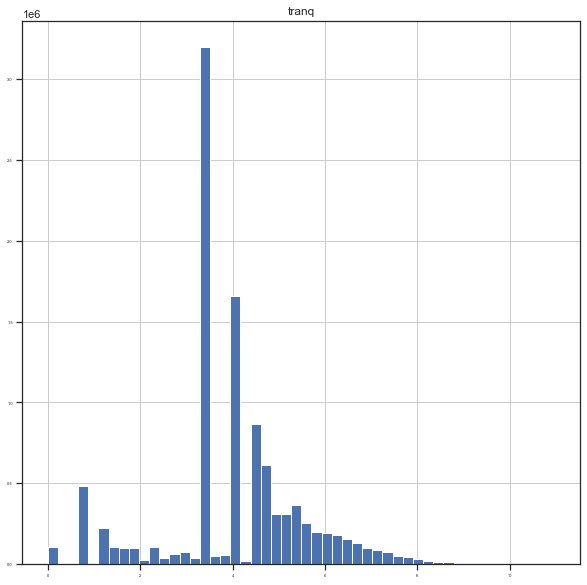

In [256]:
dfpy.hist(figsize=(10, 10), bins=50, xlabelsize=4, ylabelsize=4)

# Feature Selection

In [257]:
df3.dtypes

year                   object
yyyy_mm                object
store_code             object
district               object
sku                     int32
item_name              object
genery                 object
affiliation            object
customers             float64
price                 float64
tranq                 float64
form                   object
q_pac                 float64
pharmaco_3             object
pharmaco_c             object
affiliation_Binary    float64
district_Binary       float64
pharmaco_c_Binary     float64
store_code_Binary     float64
form_Binary           float64
dtype: object

In [118]:
df3['AMP'] = df3['AMP'].astype('int')

In [119]:
df3['CAP'] = df3['CAP'].astype('int')

In [120]:
df3['CPL'] = df3['CPL'].astype('int')

In [121]:
df3['CR'] = df3['CR'].astype('int')

In [122]:
df3['DRP'] = df3['DRP'].astype('int')

In [123]:
df3['ELX'] = df3['ELX'].astype('int')

In [124]:
df3['GEL'] = df3['GEL'].astype('int')

In [125]:
df3['GRA'] = df3['GRA'].astype('int')

In [126]:
df3['INF'] = df3['INF'].astype('int')

In [127]:
df3['INJ'] = df3['INJ'].astype('int')

In [128]:
df3['LOZ'] = df3['LOZ'].astype('int')

In [129]:
df3['OIN'] = df3['OIN'].astype('int')

In [130]:
df3['PAT'] = df3['PAT'].astype('int')

In [131]:
df3['PEN'] = df3['PEN'].astype('int')

In [132]:
df3['PWD'] = df3['PWD'].astype('int')

In [133]:
df3['SOL'] = df3['SOL'].astype('int')

In [134]:
df3['SPR'] = df3['SPR'].astype('int')

In [135]:
df3['SRG'] = df3['SRG'].astype('int')

In [136]:
df3['SUP'] = df3['SUP'].astype('int')

In [137]:
df3['SUS'] = df3['SUS'].astype('int')

In [138]:
df3['SYR'] = df3['SYR'].astype('int')

In [139]:
df3['TAB'] = df3['TAB'].astype('int')

In [140]:
df3['VIA'] = df3['VIA'].astype('int')

In [258]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers     price     tranq form     q_pac  \
0  1000084527       20110   0.693147  1.517323  4.110874  TAB  4.110874   
1  1999004071       20120   0.693147  0.300105  3.433987  TAB  3.433987   
2  1999003192       20120   0.693147  0.412110  3.433987  TAB  3.433987   
3  1999001402       20110   0.693147  2.163323  2.197225  INJ  1.791759   
4  1999001542       20120   0.693147  0.148420  3.433987  TAB  3.433987   

                                  pharmaco_3 pharmaco_c  affiliation_Binary  \
0                      ANTITHROMBOTIC AGENTS       B01A           20.486952   
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B           76.558215   
2               LIPID MODIFYING AGENTS PLAIN       C10A           76.558215   
3                          IRON PREPARATIONS       B03A           20.486952   
4               LIPID MODIFYING AGENTS PLAIN       C10A           76.558215   

   district_Binary  pharmaco_c_Binary  store_code_Binary  form_Binary  
0        13.209299          12.798761           0.183249    85.070314  
1        13.209299           0.177298           0.183249    85.070314  
2        13.209299          22.798831           0.183249    85.070314  
3        13.209299           5.024373           0.183249     2.679881  
4        13.209299          22.798831           0.183249    85.070314

In [259]:
df3.dtypes

year                   object
yyyy_mm                object
store_code             object
district               object
sku                     int32
item_name              object
genery                 object
affiliation            object
customers             float64
price                 float64
tranq                 float64
form                   object
q_pac                 float64
pharmaco_3             object
pharmaco_c             object
affiliation_Binary    float64
district_Binary       float64
pharmaco_c_Binary     float64
store_code_Binary     float64
form_Binary           float64
dtype: object

In [260]:
cols = list(df3.columns.values)
cols

['year',
 'yyyy_mm',
 'store_code',
 'district',
 'sku',
 'item_name',
 'genery',
 'affiliation',
 'customers',
 'price',
 'tranq',
 'form',
 'q_pac',
 'pharmaco_3',
 'pharmaco_c',
 'affiliation_Binary',
 'district_Binary',
 'pharmaco_c_Binary',
 'store_code_Binary',
 'form_Binary']

In [286]:
df4['AMP'].value_counts()

0    10413512
1       72214
Name: AMP, dtype: int64

In [268]:
df4 = df3[[
 'year',
 'yyyy_mm',
 'store_code',
 'district',
 'sku',
 'item_name',
 'genery',
 'affiliation',
 'customers',
 'price',
 'tranq',
 'form',
 'q_pac',
 'pharmaco_3',
 'affiliation_Binary',
 'district_Binary',
 'pharmaco_c_Binary',
 'store_code_Binary',
 'form_Binary']]
df4.head()

MemoryError: 

In [263]:
df4.iloc[1]

year                                                       2017
yyyy_mm                                                  201711
store_code                                                 5224
district                                                    477
sku                                                  1000110761
item_name                                    PAMID TAB 2.5mg 30
genery                                               1999004071
affiliation                                               20120
customers                                              0.693147
price                                                  0.300105
tranq                                                   3.43399
form                                                        TAB
q_pac                                                   3.43399
pharmaco_3            LOW CEILING DIURETICS EXCLUDING THIAZIDES
pharmaco_c                                                 C03B
affiliation_Binary                      

In [264]:
df4.dtypes

year                   object
yyyy_mm                object
store_code             object
district               object
sku                     int32
item_name              object
genery                 object
affiliation            object
customers             float64
price                 float64
tranq                 float64
form                   object
q_pac                 float64
pharmaco_3             object
pharmaco_c             object
affiliation_Binary    float64
district_Binary       float64
pharmaco_c_Binary     float64
store_code_Binary     float64
form_Binary           float64
dtype: object

In [147]:
df4['yyyy_mm'] = df4['yyyy_mm'].astype('int')

In [148]:
df4['store_code'] = df4['store_code'].astype('int')

In [149]:
df4['district'] = df4['district'].astype('int')

In [150]:
df4['genery'] = df4['genery'].astype('int')

In [152]:
df4.head()

yyyy_mm  store_code  district         sku      genery  customers     price  \
0   201711        5224       477  1000084527  1000084527   0.693147  1.517323   
1   201711        5224       477  1000110761  1999004071   0.693147  0.300105   
2   201711        5224       477  1000111352  1999003192   0.693147  0.412110   
3   201711        5224       477  1110006071  1999001402   0.693147  2.163323   
4   201711        5224       477  1110014724  1999001542   0.693147  0.148420   

      tranq     q_pac  affiliation_Binary  ...  PEN  PWD  SOL  SPR  SRG  SUP  \
0  4.110874  4.110874           20.486952  ...    0    0    0    0    0    0   
1  3.433987  3.433987           76.558215  ...    0    0    0    0    0    0   
2  3.433987  3.433987           76.558215  ...    0    0    0    0    0    0   
3  2.197225  1.791759           20.486952  ...    0    0    0    0    0    0   
4  3.433987  3.433987           76.558215  ...    0    0    0    0    0    0   

   SUS  SYR  TAB  VIA  
0    0    0    1    0  
1    0    0    1    0  
2    0    0    1    0  
3    0    0    0    0  
4    0    0    1    0  

[5 rows x 36 columns]

In [180]:
varSel = pd.DataFrame({'Variable': df4.columns[0:35]})
varSel.head()

Variable
0           customers
1               price
2               tranq
3               q_pac
4  affiliation_Binary

In [71]:
#from pyMechkar.analysis import Table1

In [189]:
df4['AMP'] = df4['AMP'].astype('float')

In [193]:
df4 = df3[[
 'customers',
 'price',
 'tranq',
 'q_pac',
 'affiliation_Binary',
 'district_Binary',
 'pharmaco_c_Binary',
 'store_code_Binary',]]
df4.head()

customers     price     tranq     q_pac  affiliation_Binary  \
0   0.693147  1.517323  4.110874  4.110874           20.486952   
1   0.693147  0.300105  3.433987  3.433987           76.558215   
2   0.693147  0.412110  3.433987  3.433987           76.558215   
3   0.693147  2.163323  2.197225  1.791759           20.486952   
4   0.693147  0.148420  3.433987  3.433987           76.558215   

   district_Binary  pharmaco_c_Binary  store_code_Binary  
0        13.209299          12.798761           0.183249  
1        13.209299           0.177298           0.183249  
2        13.209299          22.798831           0.183249  
3        13.209299           5.024373           0.183249  
4        13.209299          22.798831           0.183249

In [194]:
df4.dtypes

customers             float64
price                 float64
tranq                 float64
q_pac                 float64
affiliation_Binary    float64
district_Binary       float64
pharmaco_c_Binary     float64
store_code_Binary     float64
dtype: object

In [195]:
from pyMechkar.analysis import Table1

In [196]:
Tab1 = Table1(df4, y="Class")

Begining analysis...
Factorizing... please wait
[********
[]
------ Finished in 9.145761013031006econds -----


In [197]:
Tab1

Del           Variables    Categories  n                    Population
0     0         Individuals             n  1                      10485726
1     0           customers     Mean (SD)  1               1.20 (    0.80)
2     0           customers  Median (IQR)  2      0.70 (    0.70-    1.40)
3     1           customers   Missing (%)  3                           -- 
4     0               price     Mean (SD)  1               1.60 (    1.40)
5     0               price  Median (IQR)  2      1.70 (    0.20-    2.70)
6     1               price   Missing (%)  3                           -- 
7     0               tranq     Mean (SD)  1               4.00 (    1.50)
8     0               tranq  Median (IQR)  2      4.10 (    3.40-    4.80)
9     1               tranq   Missing (%)  3                           -- 
10    0               q_pac     Mean (SD)  1               3.30 (    0.70)
11    0               q_pac  Median (IQR)  2      3.40 (    3.40-    3.40)
12    1               q_pac   Missing (%)  3                           -- 
13    0  affiliation_Binary     Mean (SD)  1              62.80 (   25.00)
14    0  affiliation_Binary  Median (IQR)  2     76.60 (   76.60-   76.60)
15    1  affiliation_Binary   Missing (%)  3                           -- 
16    0     district_Binary     Mean (SD)  1              12.90 (    2.70)
17    0     district_Binary  Median (IQR)  2     13.20 (   11.40-   14.90)
18    1     district_Binary   Missing (%)  3                           -- 
19    0   pharmaco_c_Binary     Mean (SD)  1              10.60 (    7.70)
20    0   pharmaco_c_Binary  Median (IQR)  2      8.70 (    5.00-   12.80)
21    1   pharmaco_c_Binary   Missing (%)  3                           -- 
22    0   store_code_Binary     Mean (SD)  1               0.20 (    0.20)
23    0   store_code_Binary  Median (IQR)  2      0.10 (    0.10-    0.20)
24    1   store_code_Binary   Missing (%)  3                           --

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B8B159CF8>,
      dtype=object)

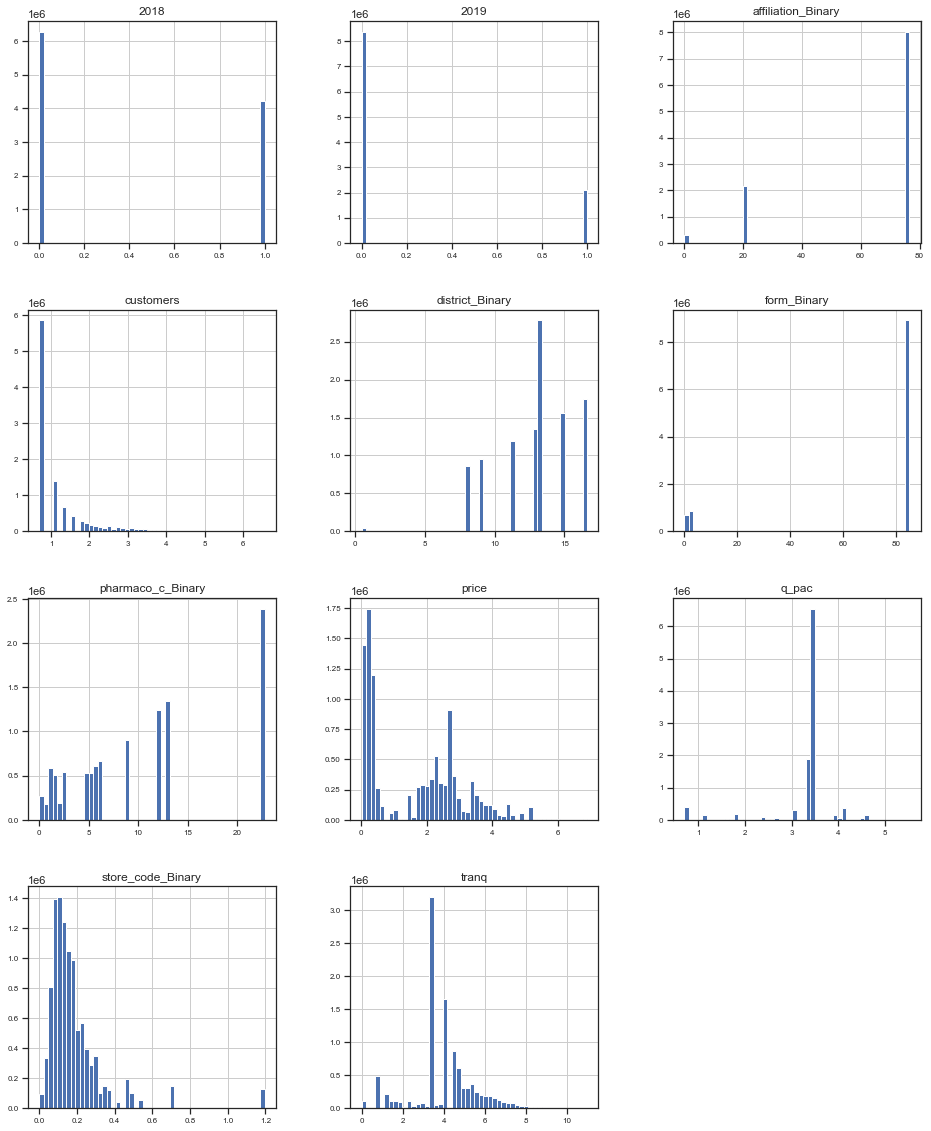

In [92]:
df4.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [293]:
df4['CAP'].value_counts()

0    10198903
1      286823
Name: CAP, dtype: int64

In [259]:
x = ['g','d','a']
for i in x :
  print('hello:', i)
print('Done!')

hello: g
hello: d
hello: a
Done!
